##**Book Recommendation System**

Recommendation systems are widely used today to recommend products to users based on their interests. 
A recommendation system is one of the strongest systems for increasing profits by retaining more users in a very big competition.
 In project, I’ll walk you through how to build a book recommendation system with Machine Learning using the Python programming language.

Recommendation systems are widely used today to recommend products to users based on their interests. A recommendation system is one of the strongest systems for increasing profits by retaining more users in a very big competition. In this mini_projectt, I’ll   walk you through how to build a book recommendation system with Machine Learning using the Python programming language.

The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.

# Content based Filtering

In the content based filtering we generate two vectors, a user vector and an item vector whose dot product would predict a rating. Information about the users and items are provided to a neural network which then generates the user and item vector

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import estimator_html_repr

import joblib
from IPython.core.display import HTML

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils, optimizers, callbacks

from sklearn.model_selection import train_test_split

# Data

In [ ]:
ratings=pd.read_csv("/content/drive/MyDrive/final_project/Book-Ratings.csv",delimiter=";",encoding= 'unicode_escape')
users=pd.read_csv("/content/drive/MyDrive/final_project/Users.csv",delimiter=";",encoding= 'unicode_escape')
books=pd.read_csv("/content/drive/MyDrive/final_project/books.csv",delimiter=";",encoding= 'unicode_escape', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 9\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8

In [ ]:
#data manipulation
books['Year-Of-Publication'] = books['Year-Of-Publication'].replace('DK Publishing Inc', np.nan).replace('Gallimard', np.nan).replace('Canterbury Press', np.nan).astype(float)


In [ ]:
#creating a new df from 2 using merging
new_ratings = ratings.merge(users, how='left').merge(books, how='left')
new_ratings.head(3)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [ ]:
 #importing libraries
import matplotlib.pyplot as plt
import seaborn

In [ ]:
users.head() # our user df has 3 features 

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#changed terminologyy
#don't wee need to split our data 

In [ ]:
book_features = ['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']
user_features = ['Location', 'Age']
target = ['Book-Rating']

x_item = new_ratings[book_features]
x_user = new_ratings[user_features]
y = new_ratings[target]

x_item.shape, x_user.shape, y.shape

((1149780, 4), (1149780, 2), (1149780, 1))

# Preprocessing

In [ ]:
def get_2d_to_1d(df):
    return df.reshape(-1)

impute_blanks = lambda: SimpleImputer(strategy='constant', fill_value='')
impute_median = lambda: SimpleImputer(strategy='median')

reshape = lambda: FunctionTransformer(get_2d_to_1d)

tfidf = lambda: TfidfVectorizer(analyzer='char', ngram_range=(2, 2))
scale = lambda: StandardScaler()

preprocessor_items = ColumnTransformer([
    ('Book-Title', Pipeline([('impute', impute_blanks()), ('reshape', reshape()), ('encoder', tfidf())]), ['Book-Title']),
    ('Book-Author', Pipeline([('impute', impute_blanks()), ('reshape', reshape()), ('encoder', tfidf())]), ['Book-Author']),
    ('Year-Of-Publication', Pipeline([('impute', impute_median()), ('encoder', scale())]), ['Year-Of-Publication']),
    ('Publisher', Pipeline([('impute', impute_blanks()), ('reshape', reshape()), ('encoder', tfidf())]), ['Publisher']),
])

preprocessor_users = ColumnTransformer([
    ('Location', Pipeline([('impute', impute_blanks()), ('reshape', reshape()), ('encoder', tfidf())]), ['Location']),
    ('Age', Pipeline([('impute', impute_median()), ('encoder', scale())]), ['Age']),
])

ratings_scaler = MinMaxScaler()


# item_train= preprocessor_items.fit_transform(item_train)
# item_test= preprocessor_items.fit_transform(item_test)
# user_train= preprocessor_users.fit_transform(user_train)
# user_test= preprocessor_users.fit_transform(user_test)
# y_train= ratings_scaler.fit_transform(y_train)
# y_test= ratings_scaler.fit_transform(y_test)




x_item = preprocessor_items.fit_transform(x_item)
x_user = preprocessor_users.fit_transform(x_user)
y = ratings_scaler.fit_transform(y).reshape(-1)

x_item.shape, x_user.shape


#item_train.shape ,item_test.shape , user_train.shape ,  user_test.shape , y_train.shape , y_test.shape

((1149780, 5478), (1149780, 1687))

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# # reduce dimensionality for improved performance
# svd = TruncatedSVD(n_components=1687)
# x_item = svd.fit_transform(x_item)
# x_user =svd.fit_transform(x_user)
# this is cauisng the system to crash due to resources I wont't implement it for now 

In [ ]:
#just having a glipmse of our preprocessing

HTML(estimator_html_repr(preprocessor_items))

In [ ]:
HTML(estimator_html_repr(preprocessor_users))

When working with tensors that contain a lot of zero values, it is important to store them in a space- and time-efficient manner. Sparse tensors enable efficient storage and processing of tensors that contain a lot of zero values. Sparse tensors are used extensively in encoding schemes like TF-IDF as part of data pre-processing in NLP applications and for pre-processing images with a lot of dark pixels in computer vision applications.

Sparse tensors in TensorFlow
TensorFlow represents sparse tensors through the tf.sparse.SparseTensor object. Currently, sparse tensors in TensorFlow are encoded using the coordinate list (COO) format. This encoding format is optimized for hyper-sparse matrices such as embeddings.

The COO encoding for sparse tensors is comprised of:

values: A 1D tensor with shape [N] containing all nonzero values.
indices: A 2D tensor with shape [N, rank], containing the indices of the nonzero values.
dense_shape: A 1D tensor with shape [rank], specifying the shape of the tensor.
A nonzero value in the context of a tf.sparse.SparseTensor is a value that's not explicitly encoded. It is possible to explicitly include zero values in the values of a COO sparse matrix, but these "explicit zeros" are generally not included when referring to nonzero values in a sparse tensor.

In [ ]:
def sparse_array_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [ ]:
from scipy.sparse import csr_matrix

x_item_pca=csr_matrix(x_item)
x_user_pca=csr_matrix(x_user)


In [ ]:
# item_train= sparse_array_to_sparse_tensor(x_item)
# item_test= sparse_array_to_sparse_tensor(x_item)
# user_train= sparse_array_to_sparse_tensor(user_train)
# user_test= sparse_array_to_sparse_tensor(user_test)
# y_train= y
# y_test= y





x_item = sparse_array_to_sparse_tensor(x_item)
x_user = sparse_array_to_sparse_tensor(x_user)
y = y

In [ ]:
# # scale training data
# sc = StandardScaler(with_mean=False)
# item_train = sc.fit_transform(item_train)
# user_train = sc.fit_transform(user_train)
# item_train_unscaled = item_train
# user_train_unscaled = user_train
# y_train_unscaled    = y_train

# # scalerItem = StandardScaler()
# # scalerItem.fit(item_train)
# # item_train = scalerItem.transform(item_train)

# # scalerUser = StandardScaler()
# # scalerUser.fit(user_train)
# # user_train = scalerUser.transform(user_train)

# # scalerTarget = MinMaxScaler((-1, 1))
# # scalerTarget.fit(y_train.reshape(-1, 1))
# # y_train = scalerTarget.transform(y_train.reshape(-1, 1))
# # #ynorm_test = scalerTarget.transform(y_test.reshape(-1, 1))

# # print(np.allclose(item_train_unscaled, scalerItem.inverse_transform(item_train)))
# # print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))

In [ ]:

print(f"book/item training data shape: {x_item.shape}")
print(f"book/item test data shape: {x_user.shape}")

book/item training data shape: (1149780, 5478)
book/item test data shape: (1149780, 1687)


In [ ]:
#changed layer density from 32 to 24
#model can be improved by varying learning rate ,number of epochs,

**Building the Neural Networks**

In [ ]:
items_input = layers.Input(shape=(x_item.shape[1]))
items_ = layers.Dense(32, activation='relu')(items_input)
items_vector = layers.Dense(32, activation='relu')(items_)

users_input = layers.Input(shape=(x_user.shape[1]))
users_ = layers.Dense(32, activation='relu')(users_input)
users_vector = layers.Dense(32, activation='relu')(users_)

items_norm = tf.linalg.l2_normalize(items_vector, axis=1)
users_norm = tf.linalg.l2_normalize(users_vector, axis=1)

output = layers.Dot(axes=1)([items_norm, users_norm])

model = models.Model([items_input, users_input], output)

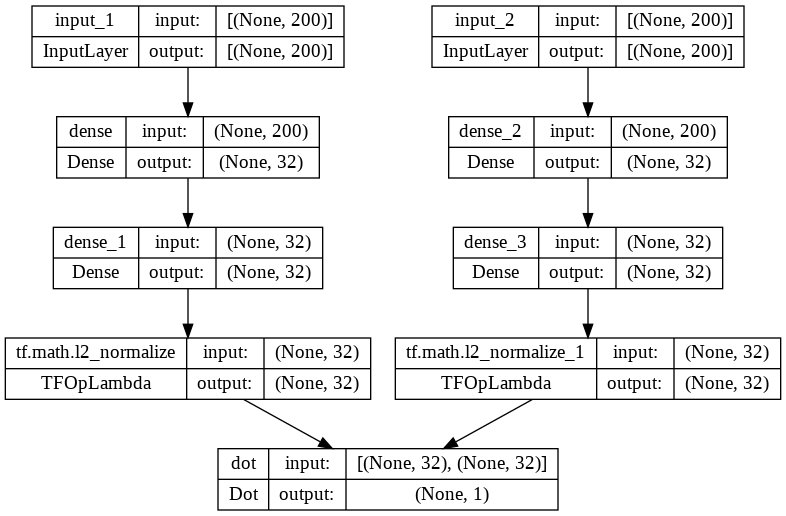

In [ ]:
utils.plot_model(model, show_shapes=True, expand_nested=True)

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.

In [ ]:
#we can use different optimizer and different learning rate 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))
model.summary()

es = callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)
rlp = callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1)

model.fit([x_item, x_user], y, callbacks=[es, rlp], epochs=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5478)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1687)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           175328      ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           54016       ['input_2[0][0]']                
                                                                                              

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense_2/embeddin

35931/35931 [==============================] - 199s 5ms/step - loss: 0.1295 - lr: 0.0050


# Saving the models

In [ ]:
model_items = models.Model(items_input, items_vector)
model_users = models.Model(users_input, users_vector)

joblib.dump(preprocessor_items, 'preprocessor_items.bin')
joblib.dump(preprocessor_users, 'preprocessor_users.bin')

model_items.save('model_items.h1')
model_users.save('model_users.h1')
model.save('model.h1')

In [ ]:
input_items_vec = layers.Input(shape=(32))
norm_items = tf.linalg.l2_normalize(input_items_vec, axis=1)
input_users_vec = layers.Input(shape=(32))
norm_users = tf.linalg.l2_normalize(input_users_vec, axis=1)
output = layers.Dot(axes=1)([norm_items, norm_users])
dot_model = models.Model([input_items_vec, input_users_vec], output)
dot_model.save('dot_model.h1')

# Getting Recommendations

In [ ]:
new_user = pd.DataFrame({'Location': ['Istanbul, Turkey'], 'Age': [33]})
new_user_preprocessed = preprocessor_users.transform(new_user)
new_user_vector = model_users.predict(new_user_preprocessed)
new_user_vector.shape

1/1 [==============================] - 0s 94ms/step


(1, 32)

In [ ]:
new_user_vector

array([[0.00000000e+00, 0.00000000e+00, 2.94611192e+00, 3.87410045e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.06367874e-05,
        0.00000000e+00, 2.74166012e+00, 2.63923615e-01, 0.00000000e+00,
        2.36511350e-01, 0.00000000e+00, 1.62796557e-01, 0.00000000e+00,
        0.00000000e+00, 1.09524846e-01, 2.24046588e-01, 4.13349628e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.11733437e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
      dtype=float32)

In [ ]:
all_item_preprocessed = preprocessor_items.transform(books[book_features])
all_item_vector = model_items.predict(all_item_preprocessed)
all_item_vector.shape

8480/8480 [==============================] - 18s 2ms/step


(271360, 32)

In [ ]:
new_user_vector = np.broadcast_to(new_user_vector, all_item_vector.shape)
preds = dot_model.predict([new_user_vector, all_item_vector])
books['preds'] = preds

8480/8480 [==============================] - 11s 1ms/step


**Recommendations**

In [ ]:
books.sort_values('preds', ascending=False).head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,preds
13579,1569314748,X/1999-Duet (Book 6),Clamp,2000.0,VIZ LLC,http://images.amazon.com/images/P/1569314748.0...,http://images.amazon.com/images/P/1569314748.0...,http://images.amazon.com/images/P/1569314748.0...,0.642263
187089,1569318964,"Fugue (X/1999, Vol. 10)",Clamp,2003.0,VIZ LLC,http://images.amazon.com/images/P/1569318964.0...,http://images.amazon.com/images/P/1569318964.0...,http://images.amazon.com/images/P/1569318964.0...,0.635943
13580,1569314071,X/1999 : Serenade (X/1999),Clamp,1999.0,VIZ LLC,http://images.amazon.com/images/P/1569314071.0...,http://images.amazon.com/images/P/1569314071.0...,http://images.amazon.com/images/P/1569314071.0...,0.632374
55023,0553078755,Ishmael,Daniel Quinn,1997.0,Bantam,http://images.amazon.com/images/P/0553078755.0...,http://images.amazon.com/images/P/0553078755.0...,http://images.amazon.com/images/P/0553078755.0...,0.627738
72162,0152023984,The Little Prince,Antoine de Saint-ExupÃ©ry,2000.0,Harcourt Children's Books,http://images.amazon.com/images/P/0152023984.0...,http://images.amazon.com/images/P/0152023984.0...,http://images.amazon.com/images/P/0152023984.0...,0.623991


In [ ]:
# can we predict for an existing user 
#new south wales, australia	16.0




In [ ]:
new_user_1 = pd.DataFrame({'Location': ['new south wales, Australia'], 'Age': [16]})
new_user_1_preprocessed = preprocessor_users.transform(new_user_1)
new_user_1_vector = model_users.predict(new_user_1_preprocessed)
new_user_1_vector.shape





1/1 [==============================] - 0s 7ms/step


(1, 32)

In [ ]:
all_item_preprocessed = preprocessor_items.transform(books[book_features])
all_item_vector = model_items.predict(all_item_preprocessed)
all_item_vector.shape


8480/8480 [==============================] - 18s 2ms/step


(271360, 32)

In [ ]:
new_user_vector_1 = np.broadcast_to(new_user_1_vector, all_item_vector.shape)
preds_1 = dot_model.predict([new_user_vector_1, all_item_vector])
books['preds_1'] = preds_1


8480/8480 [==============================] - 12s 1ms/step


In [ ]:
books.sort_values('preds_1', ascending=False).head()
#books.sort_values('preds', ascending=False).head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,preds,preds_1
13580,1569314071,X/1999 : Serenade (X/1999),Clamp,1999.0,VIZ LLC,http://images.amazon.com/images/P/1569314071.0...,http://images.amazon.com/images/P/1569314071.0...,http://images.amazon.com/images/P/1569314071.0...,0.632374,0.805383
187089,1569318964,"Fugue (X/1999, Vol. 10)",Clamp,2003.0,VIZ LLC,http://images.amazon.com/images/P/1569318964.0...,http://images.amazon.com/images/P/1569318964.0...,http://images.amazon.com/images/P/1569318964.0...,0.635943,0.803805
13577,1591160502,"X/1999, Vol. 8: Crescendo",Clamp,2002.0,VIZ LLC,http://images.amazon.com/images/P/1591160502.0...,http://images.amazon.com/images/P/1591160502.0...,http://images.amazon.com/images/P/1591160502.0...,0.622782,0.800525
13578,156931568X,"X/1999, Vol. 7: Rhapsody",Clamp,2002.0,VIZ LLC,http://images.amazon.com/images/P/156931568X.0...,http://images.amazon.com/images/P/156931568X.0...,http://images.amazon.com/images/P/156931568X.0...,0.619212,0.800041
13579,1569314748,X/1999-Duet (Book 6),Clamp,2000.0,VIZ LLC,http://images.amazon.com/images/P/1569314748.0...,http://images.amazon.com/images/P/1569314748.0...,http://images.amazon.com/images/P/1569314748.0...,0.642263,0.799960


In [ ]:
new_ratings.loc[new_ratings['User-ID']==276727]
#one epoch need to add more 

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


we have seen that the model couldn't predictfor user with a zero rating lets try for for a user with a better book _rating


In [ ]:
new_user_2 = pd.DataFrame({'Location': ['seattle, washington, usa'], 'Age': [30]})
new_user_2_preprocessed = preprocessor_users.transform(new_user_2)
new_user_2_vector = model_users.predict(new_user_2_preprocessed)
new_user_2_vector.shape


1/1 [==============================] - 0s 23ms/step


(1, 32)

In [ ]:
all_item_preprocessed = preprocessor_items.transform(books[book_features])
all_item_vector = model_items.predict(all_item_preprocessed)
all_item_vector.shape

In [ ]:
new_user_vector_2 = np.broadcast_to(new_user_2_vector, all_item_vector.shape)
preds_2 = dot_model.predict([new_user_vector_2, all_item_vector])
books['preds_2'] = preds_2

8480/8480 [==============================] - 11s 1ms/step


In [ ]:
books.sort_values('preds_2', ascending=False).head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,preds,preds_1,preds_2
15175,1563893304,Kingdom Come (Graphic Novel),Mark Waid,1997.0,DC Comics,http://images.amazon.com/images/P/1563893304.0...,http://images.amazon.com/images/P/1563893304.0...,http://images.amazon.com/images/P/1563893304.0...,0.611627,0.778074,0.622985
117469,1569317674,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002.0,Viz Comics,http://images.amazon.com/images/P/1569317674.0...,http://images.amazon.com/images/P/1569317674.0...,http://images.amazon.com/images/P/1569317674.0...,0.605594,0.762183,0.607228
117471,1569317666,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002.0,Viz Comics,http://images.amazon.com/images/P/1569317666.0...,http://images.amazon.com/images/P/1569317666.0...,http://images.amazon.com/images/P/1569317666.0...,0.605594,0.762183,0.607228
117473,1569317658,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002.0,Viz Comics,http://images.amazon.com/images/P/1569317658.0...,http://images.amazon.com/images/P/1569317658.0...,http://images.amazon.com/images/P/1569317658.0...,0.605594,0.762183,0.607228
117468,1569317682,Zoids Chaotic Century (Zoids: Chaotic Century ...,Michiro Ueyama,2002.0,Viz Comics,http://images.amazon.com/images/P/1569317682.0...,http://images.amazon.com/images/P/1569317682.0...,http://images.amazon.com/images/P/1569317682.0...,0.605594,0.762183,0.607228
